## **1. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from ucimlrepo import fetch_ucirepo

## **2. Import Dataset**

### **2.1 Download Raw Dataset**

In [2]:
heart_disease = fetch_ucirepo(id=45) 

X = heart_disease.data.features 
y = heart_disease.data.targets 

print(heart_disease.metadata) 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

### **2.2 Save Raw Dataset**

In [3]:
# combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
df.to_csv('../datasets/raw/ds2_uci_heart.csv', index=False)

### **2.3 Load Dataset**

In [5]:
df = pd.read_csv('../datasets/raw/ds2_uci_heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


   num  Sample  Percentage(%)
0    0     164          54.13
1    1     139          45.87


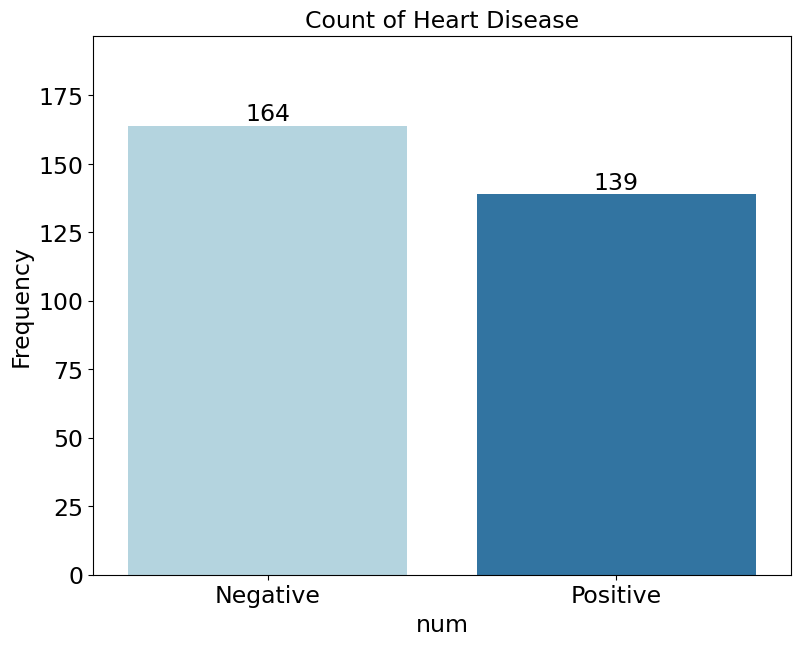

In [6]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
summary_df = df[categorical_features[8]].value_counts().rename_axis(categorical_features[8]).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(2)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=categorical_features[8], hue=categorical_features[8], order=summary_df[categorical_features[8]], palette={True: 'tab:blue', False: 'lightblue'}, dodge=False, legend=False)
ax.set_xticks([False, True])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel(categorical_features[8], fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[categorical_features[8]].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

## **3. Data Understanding**

UCI ML Link of dataset: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

Features Description:
- `age`: age of the patient in years
- `sex`: gender [1: male, 0: female]
- `cp`: type of chest pain [1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic]
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholesterol level in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl [1: true, 0: false]
- `restecg`: resting electrocardiographic results [0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy]
- `thalach`: maximum heart rate achieved during exercise
- `exang`: exercise-induced angina [1: yes, 0: no]
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]
- `ca`: number of major vessels (0–3) colored by fluoroscopy
- `thal`: thalassemia condition [3: normal, 6: fixed defect, 7: reversible defect]
- `num`: diagnosis of heart disease [0: < 50% diameter narrowing, 1: > 50% diameter narrowing]

### **3.1 Assessing Data**

#### **A. Data Type Check**

- The data types of the features `sex`, `fbs`, `exang`, and `num` only have 2 unique values, so they should be converted to categorical boolean types.
- The features `cp`, `restecg`, `slope`, `ca`, and `thal` contain several unique values (classes), so they should be converted to categorical boolean types using One-Hot Encoding.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


#### **B. Descriptive Statistic (Numerical Features) Check**

- No statistical anomalies found

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### **C. Data Duplicate Check**

- No duplicate data found

In [9]:
print(f'Total data: {len(df)}')
print(f'Total duplicated data: {df.duplicated().sum()}')

Total data: 303
Total duplicated data: 0


#### **D. Missing Values Check**

- There are missing values in the features `ca` and `thal`. These missing values will be handled in the Data Cleaning section.

In [10]:
print(f'Total data: {df.shape[0]}\n')
print(f'Missing Value List: \n{df.isnull().sum()}')

Total data: 303

Missing Value List: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


### **3.2 EDA - Univariate Analysis**

#### **A. Categorical Features**

In [11]:
# create df_eda with categorical numeric features converted to descriptive strings
df_eda = df.copy()

mappings = {
    'sex': {0: 'female', 1: 'male'},
    'cp': {1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'},
    'fbs': {0: 'false', 1: 'true'},
    'restecg': {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'},
    'exang': {0: 'no', 1: 'yes'},
    'slope': {1: 'upsloping', 2: 'flat', 3: 'downsloping'},
    'ca': {0.0: '0', 1.0: '1', 2.0: '2', 3.0: '3'},
    'thal': {3.0: 'normal', 6.0: 'fixed defect', 7.0: 'reversible defect'},
    'num': {0: 'Negative', 1: 'Positive'}
}

for col, mp in mappings.items():
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].map(mp)

# inspect result
df_eda.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,male,typical angina,145,233,true,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed defect,Negative
1,67,male,asymptomatic,160,286,false,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,Positive
2,67,male,asymptomatic,120,229,false,left ventricular hypertrophy,129,yes,2.6,flat,2,reversible defect,Positive
3,37,male,non-anginal pain,130,250,false,normal,187,no,3.5,downsloping,0,normal,Negative
4,41,female,atypical angina,130,204,false,left ventricular hypertrophy,172,no,1.4,upsloping,0,normal,Negative


#### **1) Distribution of the `sex` Feature**

      sex  Sample  Percentage(%)
0    male     206           68.0
1  female      97           32.0


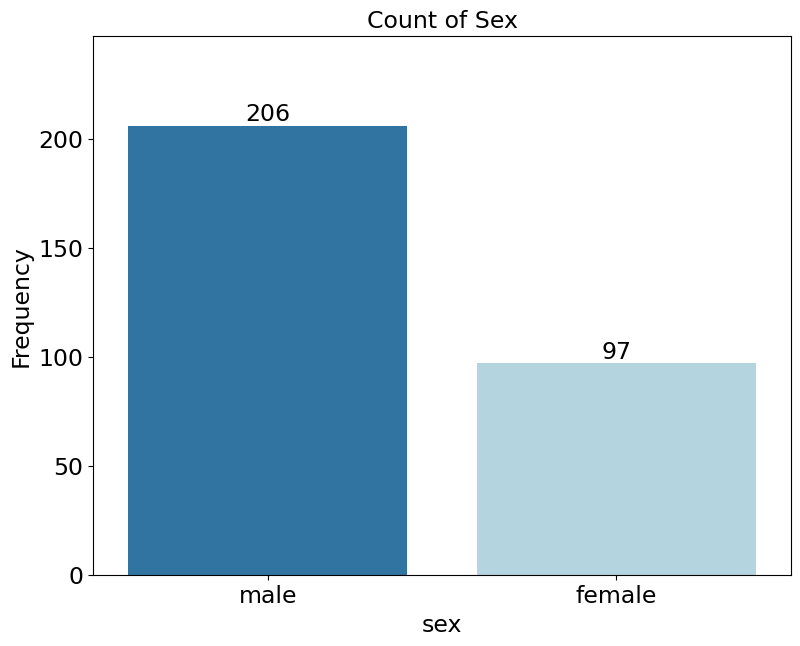

In [12]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'sex': {0: 'female', 1: 'male'}


feature = categorical_features[0]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Sex', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={ 'male': 'tab:blue', 'female': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **2) Distribution of the `cp` Feature**

                 cp  Sample  Percentage(%)
0      asymptomatic     144           47.5
1  non-anginal pain      86           28.4
2   atypical angina      50           16.5
3    typical angina      23            7.6


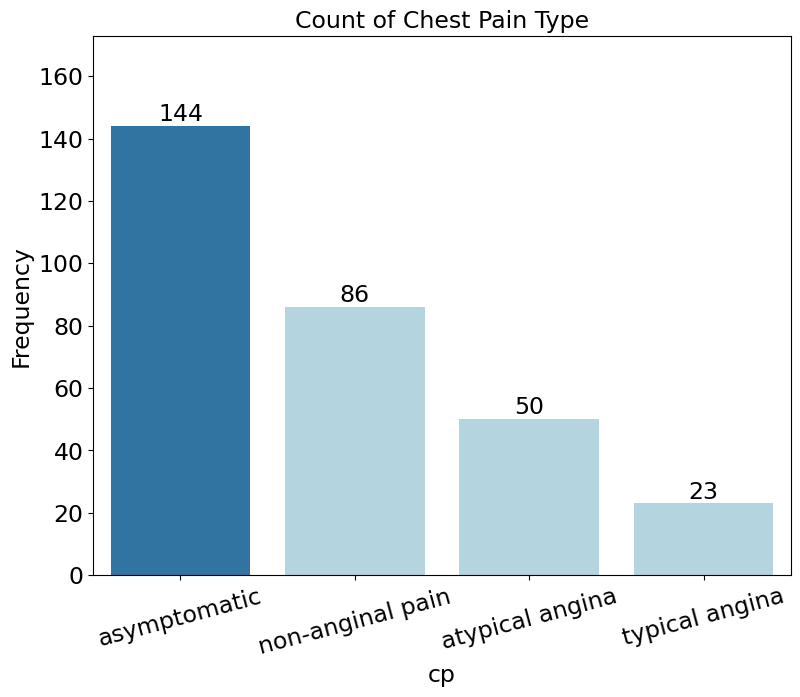

In [13]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'cp': {1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'}

feature = categorical_features[1]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Chest Pain Type', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'typical angina': 'lightblue', 'atypical angina': 'lightblue', 'non-anginal pain': 'lightblue', 'asymptomatic': 'tab:blue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.xticks(rotation=15)
plt.show()


#### **3) Distribution of the `fbs` Feature**

     fbs  Sample  Percentage(%)
0  false     258           85.1
1   true      45           14.9


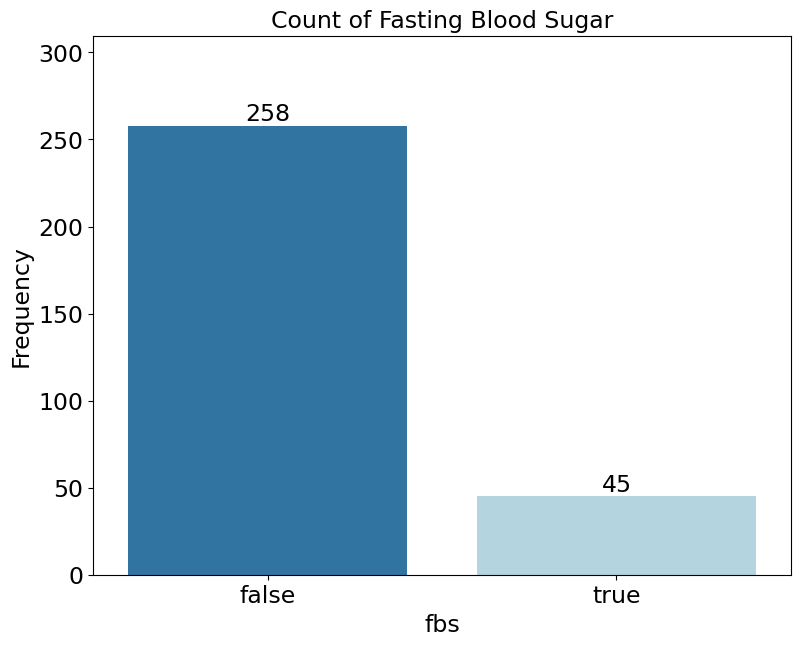

In [14]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'fbs': {0: 'false', 1: 'true'}

feature = categorical_features[2]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Fasting Blood Sugar', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'false': 'tab:blue', 'true': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **4) Distribution of the `restecg` Feature**

                        restecg  Sample  Percentage(%)
0                        normal     151           49.8
1  left ventricular hypertrophy     148           48.8
2         ST-T wave abnormality       4            1.3


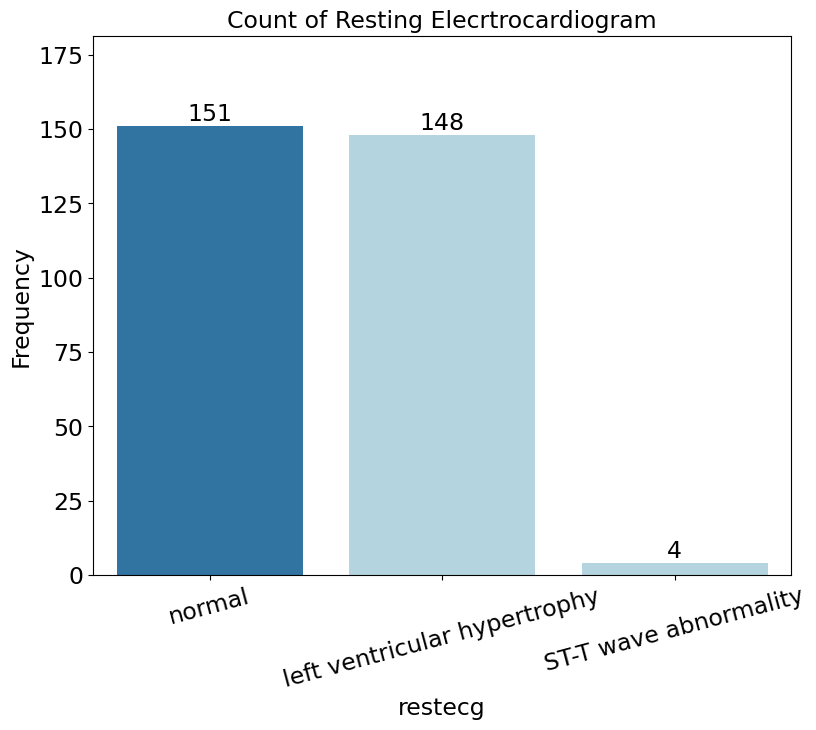

In [15]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'restecg': {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'}

feature = categorical_features[3]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Resting Elecrtrocardiogram', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'normal': 'tab:blue', 'ST-T wave abnormality': 'lightblue', 'left ventricular hypertrophy': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.xticks(rotation=15)
plt.show()

#### **5) Distribution of the `exang` Feature**

  exang  Sample  Percentage(%)
0    no     204           67.3
1   yes      99           32.7


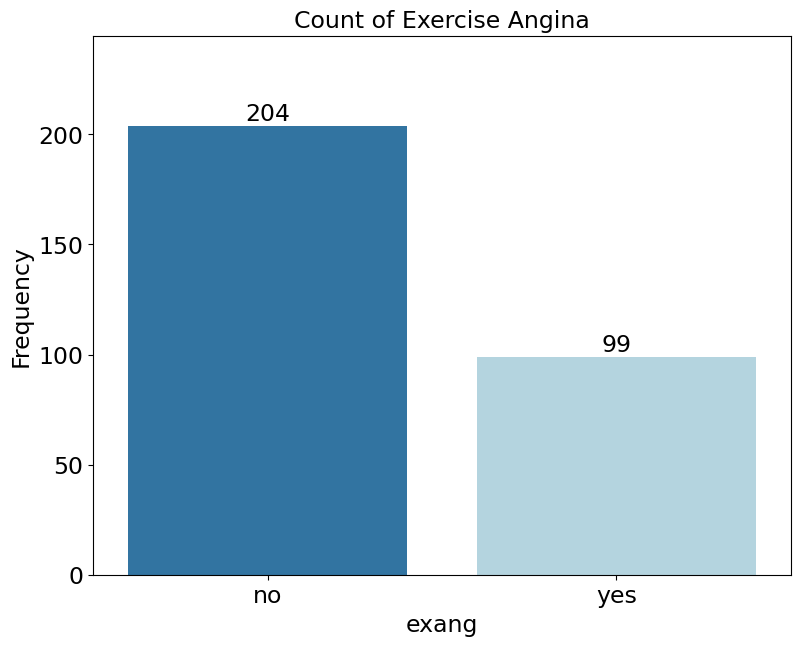

In [16]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
#'exang': {0: 'no', 1: 'yes'}

feature = categorical_features[4]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Exercise Angina', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'no': 'tab:blue', 'yes': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.show()

#### **6) Distribution of the `slope` Feature**

         slope  Sample  Percentage(%)
0    upsloping     142           46.9
1         flat     140           46.2
2  downsloping      21            6.9


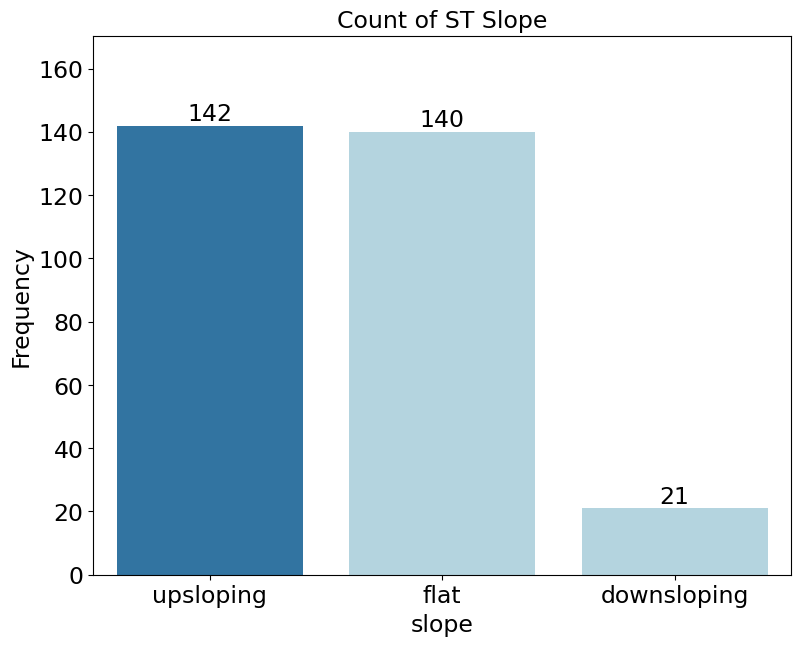

In [17]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'slope': {1: 'upsloping', 2: 'flat', 3: 'downsloping'}

feature = categorical_features[5]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of ST Slope', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'upsloping': 'tab:blue', 'flat': 'lightblue', 'downsloping': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.show()

#### **7) Distribution of the `ca` Feature**

  ca  Sample  Percentage(%)
0  0     176           58.1
1  1      65           21.5
2  2      38           12.5
3  3      20            6.6


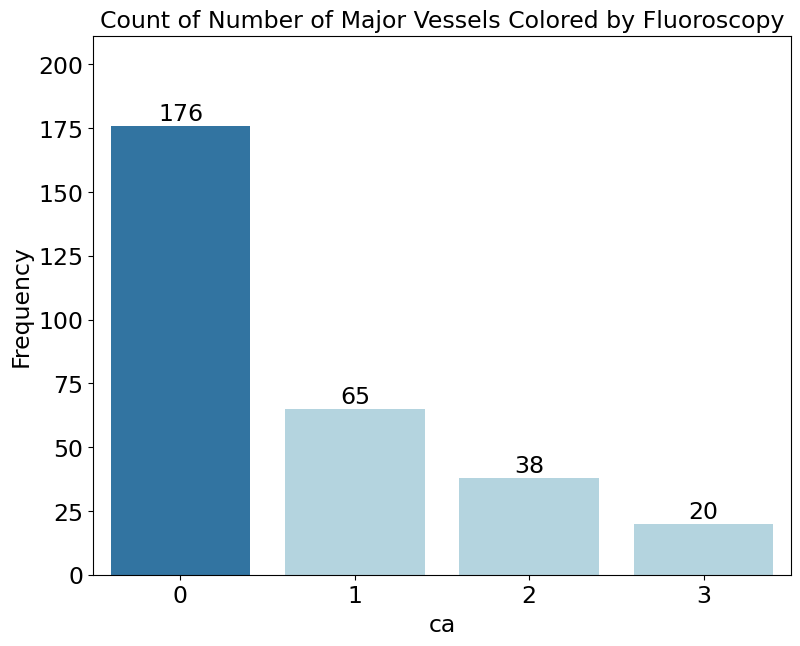

In [18]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'ca': {0.0: '0', 1.0: '1', 2.0: '2', 3.0: '3'}

feature = categorical_features[6]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Number of Major Vessels Colored by Fluoroscopy', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'0': 'tab:blue', '1': 'lightblue', '2': 'lightblue', '3': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.show()

#### **8) Distribution of the `thal` Feature**

                thal  Sample  Percentage(%)
0             normal     166           54.8
1  reversible defect     117           38.6
2       fixed defect      18            5.9


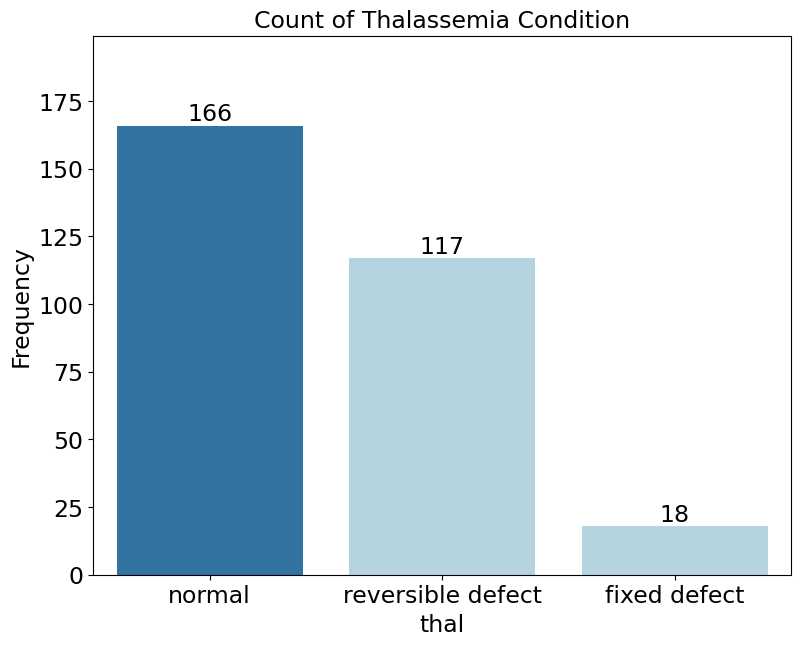

In [19]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'thal': {3.0: 'normal', 6.0: 'fixed defect', 7.0: 'reversible defect'}

feature = categorical_features[7]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Thalassemia Condition', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'normal': 'tab:blue', 'fixed defect': 'lightblue', 'reversible defect': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)
for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.show()

#### **8) Distribution of the `num` Feature**

        num  Sample  Percentage(%)
0  Negative     164           54.1
1  Positive     139           45.9


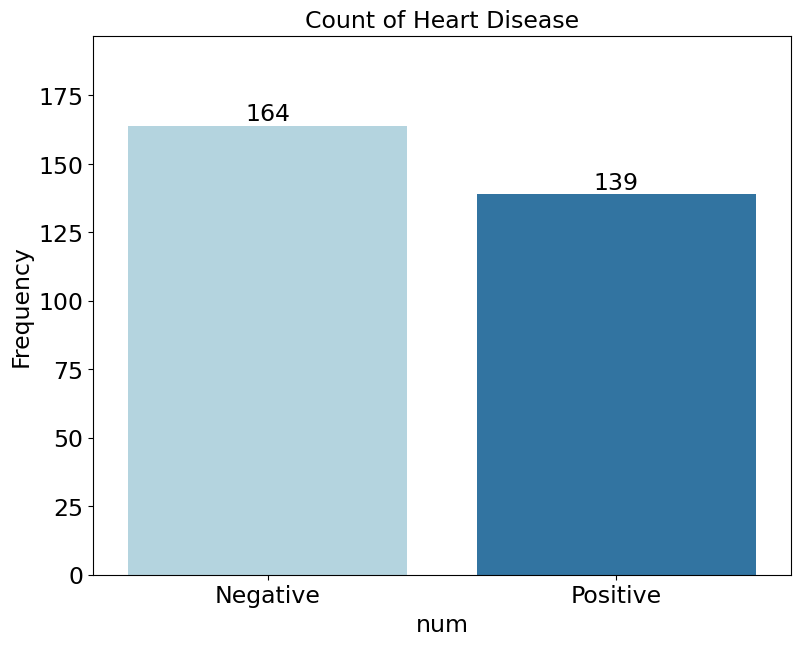

In [20]:
# categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
# 'num': {0: 'Negative', 1: 'Positive'}

feature = categorical_features[8]
summary_df = df_eda[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df_eda) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df_eda, x=feature, hue=feature, order=summary_df[feature], palette={'Negative': 'lightblue', 'Positive': 'tab:blue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df_eda[feature].value_counts().max() * 1.2)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)
plt.show()

#### **B. Numerical Features**

In [21]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### **1) Distribution of the `age` Feature**

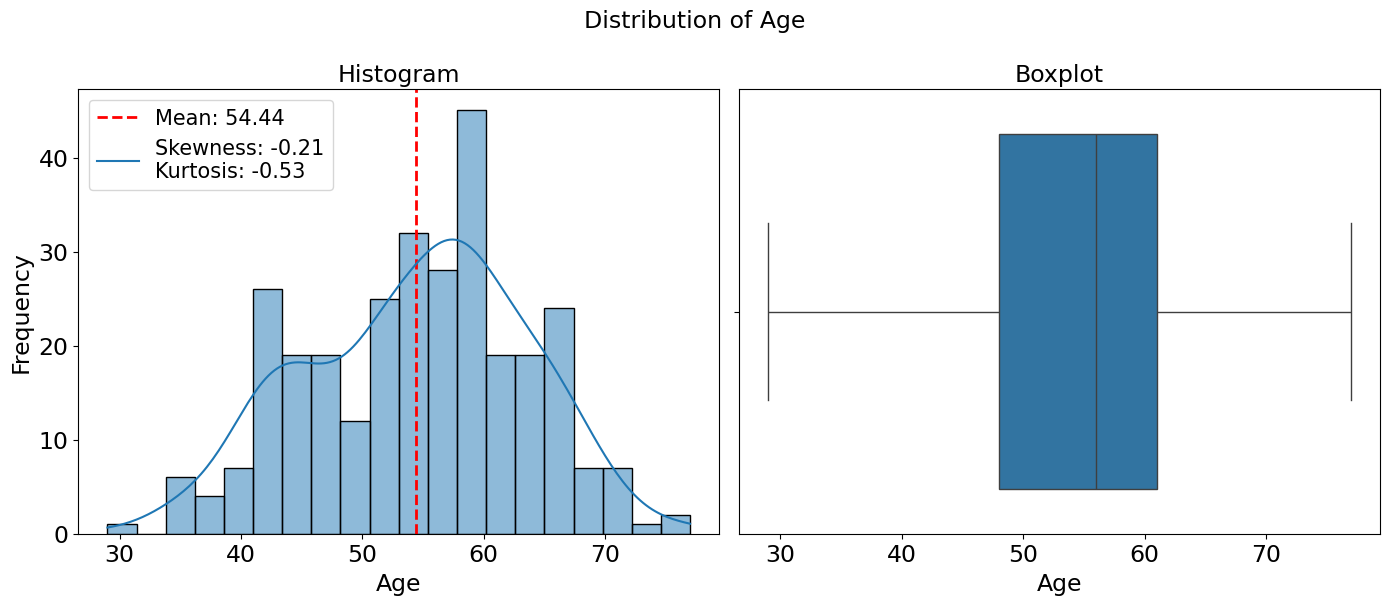

In [22]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Age', fontsize=17, y=1.001) 

mean = df_eda['age'].mean()
kurt = kurtosis(df_eda['age'])
skewness = skew(df_eda['age'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df_eda, x='age', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('Age', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df_eda, x='age', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('Age', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()


#### **2) Distribution of the `trestbps` Feature**

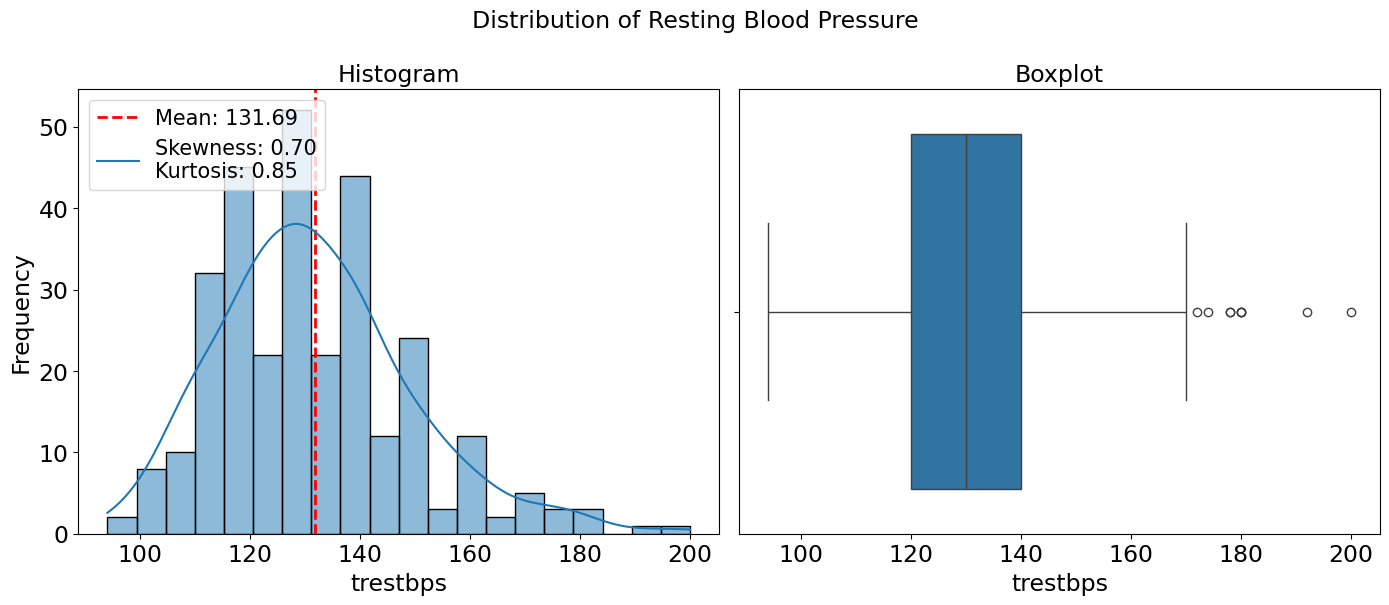

In [23]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Resting Blood Pressure', fontsize=17, y=1.001)

mean = df_eda['trestbps'].mean()
kurt = kurtosis(df_eda['trestbps'])
skewness = skew(df_eda['trestbps'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df_eda, x='trestbps', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('trestbps', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df_eda, x='trestbps', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('trestbps', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()

#### **3) Distribution of the `chol` Feature**

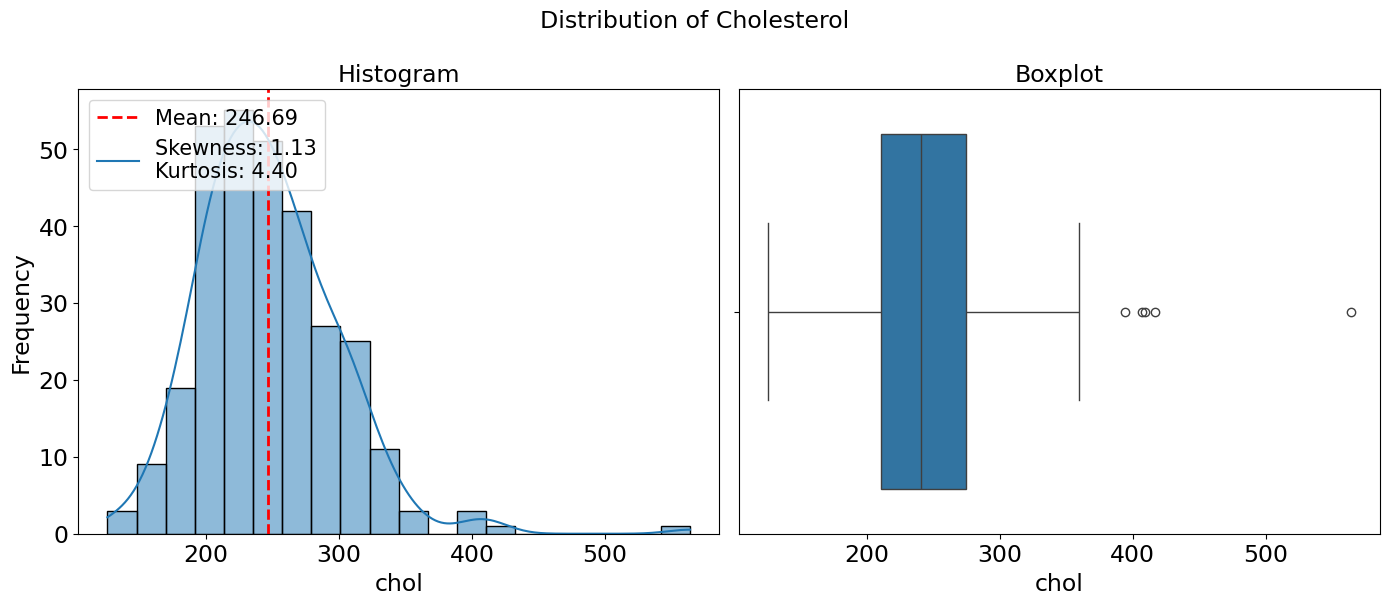

In [24]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Cholesterol', fontsize=17, y=1.001)

mean = df_eda['chol'].mean()
kurt = kurtosis(df_eda['chol'])
skewness = skew(df_eda['chol'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df_eda, x='chol', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('chol', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df_eda, x='chol', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('chol', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()

#### **4) Distribution of the `thalach` Feature**

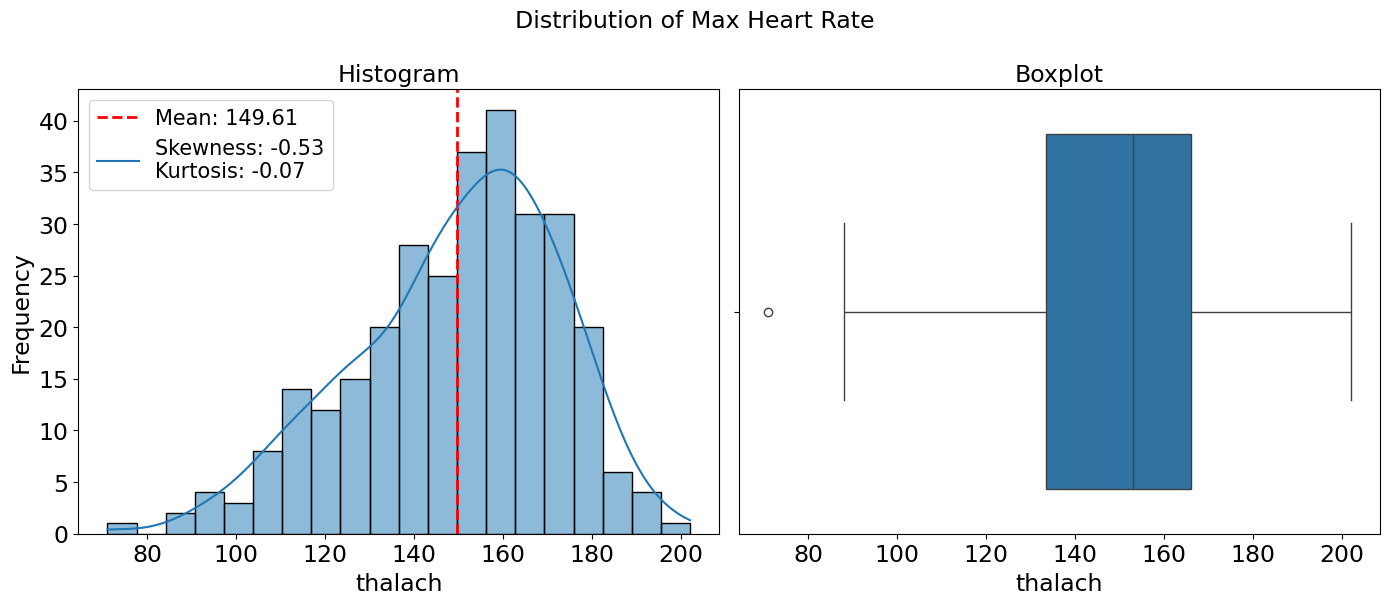

In [25]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Max Heart Rate', fontsize=17, y=1.001)

mean = df_eda['thalach'].mean()
kurt = kurtosis(df_eda['thalach'])
skewness = skew(df_eda['thalach'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df_eda, x='thalach', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('thalach', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df_eda, x='thalach', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('thalach', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()

#### **5) Distribution of the `oldpeak` Feature**

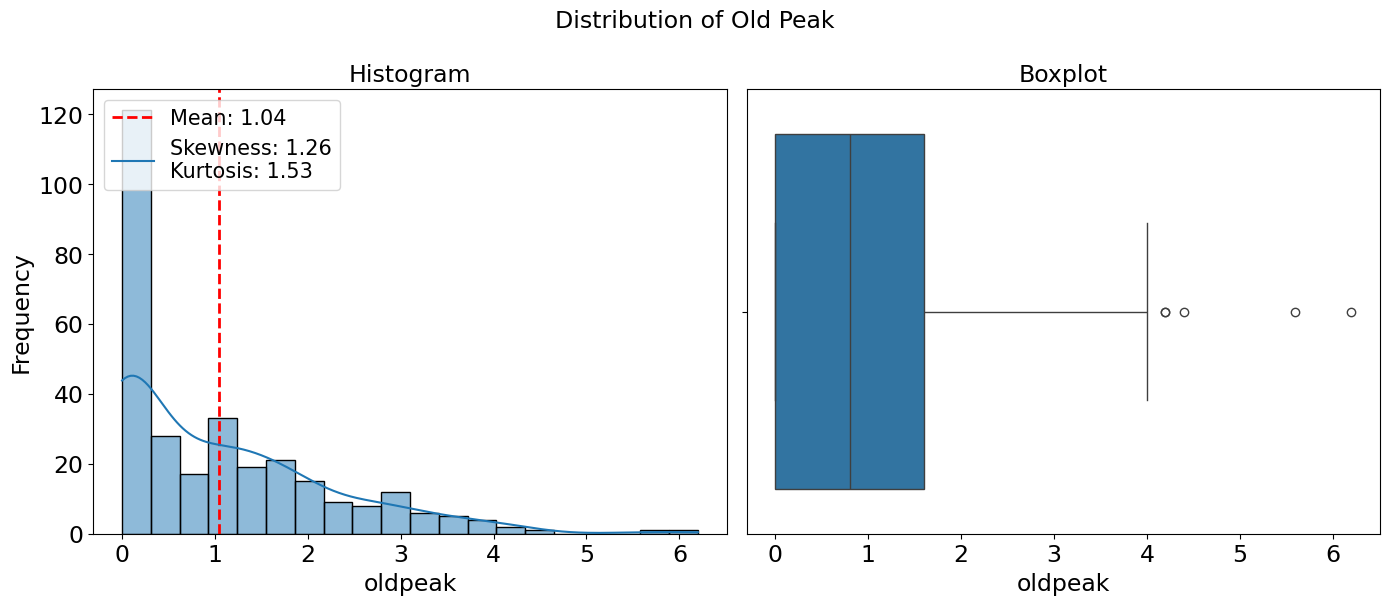

In [26]:
# numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Old Peak', fontsize=17, y=1.001)

mean = df_eda['oldpeak'].mean()
kurt = kurtosis(df_eda['oldpeak'])
skewness = skew(df_eda['oldpeak'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df_eda, x='oldpeak', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('oldpeak', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df_eda, x='oldpeak', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('oldpeak', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()

### **3.3 EDA - Multivariate Analysis**

#### **A. Categorical Features**

#### **1) Distribution of the `sex` Feature by `num`**

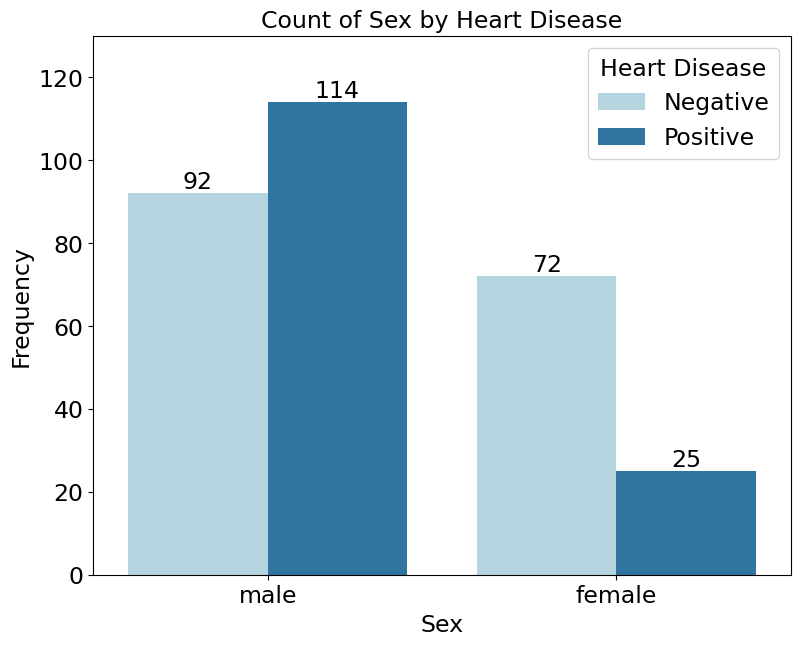

In [27]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='sex', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Sex by Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 130)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()


#### **2) Distribution of the `cp` Feature by `num`**

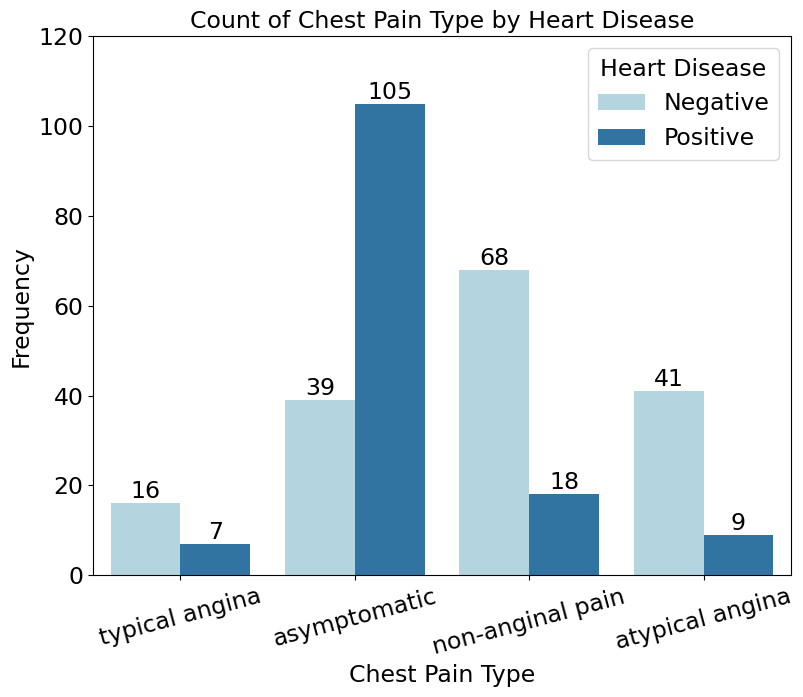

In [28]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='cp', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Chest Pain Type by Heart Disease', fontsize=17)
plt.xlabel('Chest Pain Type', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 120)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.xticks(rotation=15)
plt.show()


#### **3) Distribution of the `fbs` Feature by `num`**

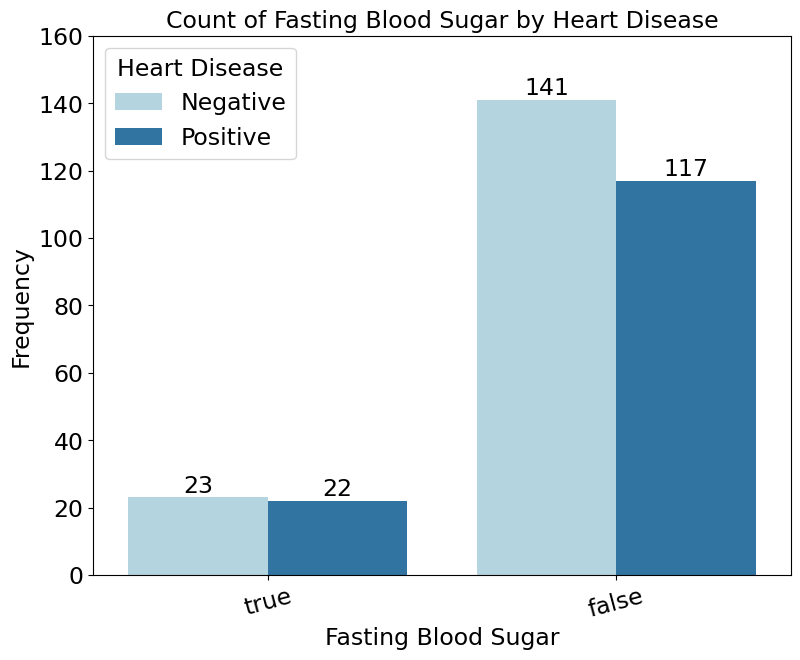

In [29]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='fbs', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Fasting Blood Sugar by Heart Disease', fontsize=17)
plt.xlabel('Fasting Blood Sugar', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 160)
plt.legend(title='Heart Disease', loc='upper left', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.xticks(rotation=15)
plt.show()


#### **4) Distribution of the `restecg` Feature by `num`**

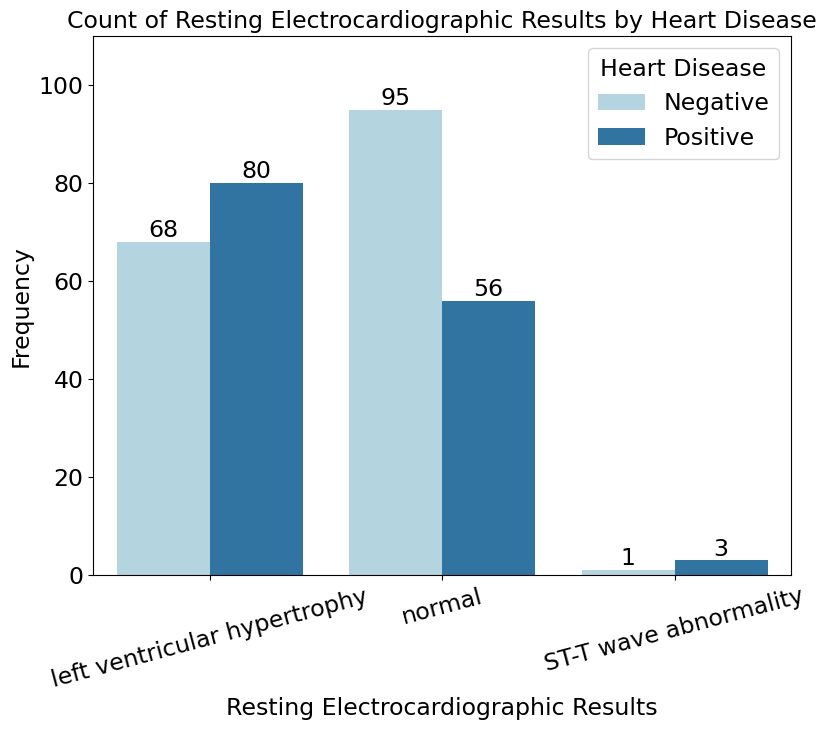

In [30]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='restecg', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Resting Electrocardiographic Results by Heart Disease', fontsize=17)
plt.xlabel('Resting Electrocardiographic Results', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 110)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.xticks(rotation=15)
plt.show()


#### **5) Distribution of the `exang` Feature by `num`**

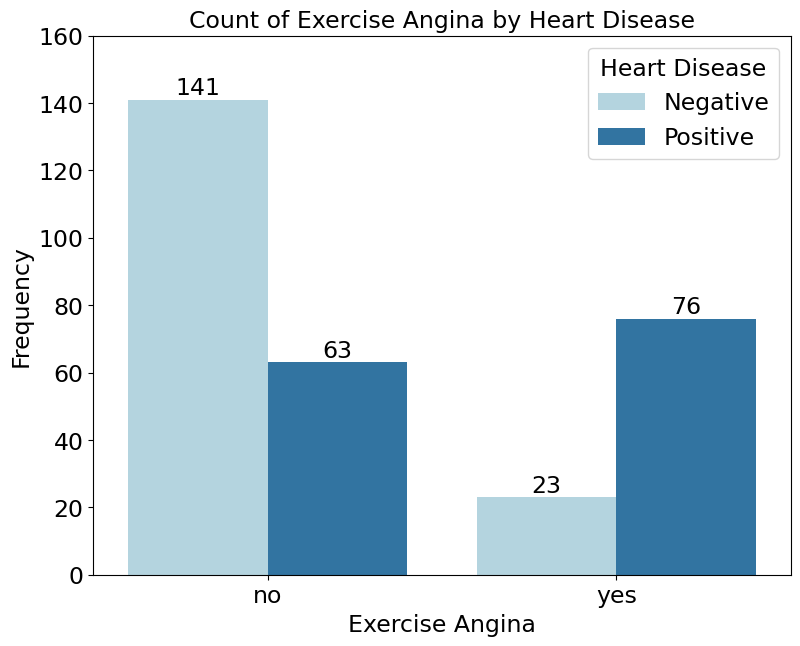

In [31]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='exang', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Exercise Angina by Heart Disease', fontsize=17)
plt.xlabel('Exercise Angina', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 160)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.show()


#### **6) Distribution of the `slope` Feature by `num`**

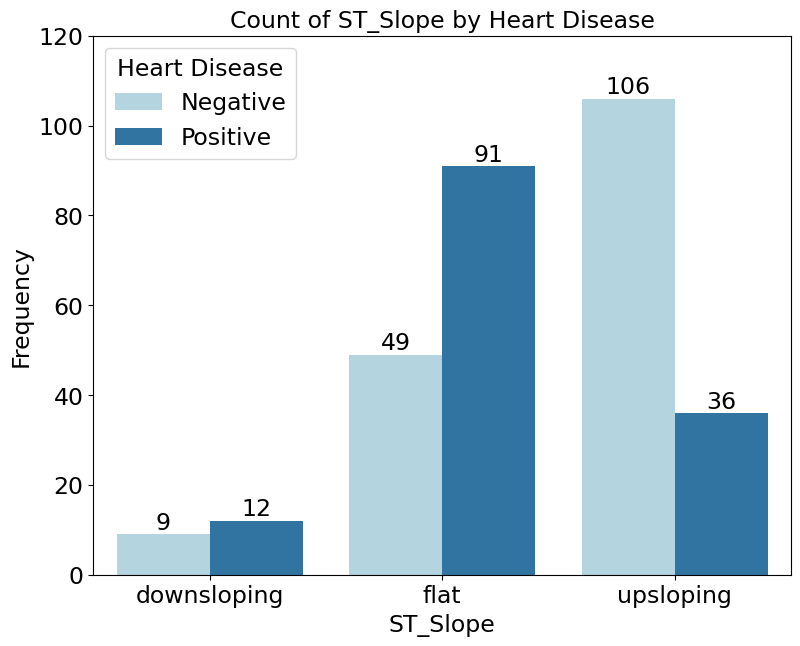

In [32]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='slope', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of ST_Slope by Heart Disease', fontsize=17)
plt.xlabel('ST_Slope', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 120)
plt.legend(title='Heart Disease', loc='upper left', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.show()


#### **7) Distribution of the `ca` Feature by `num`**

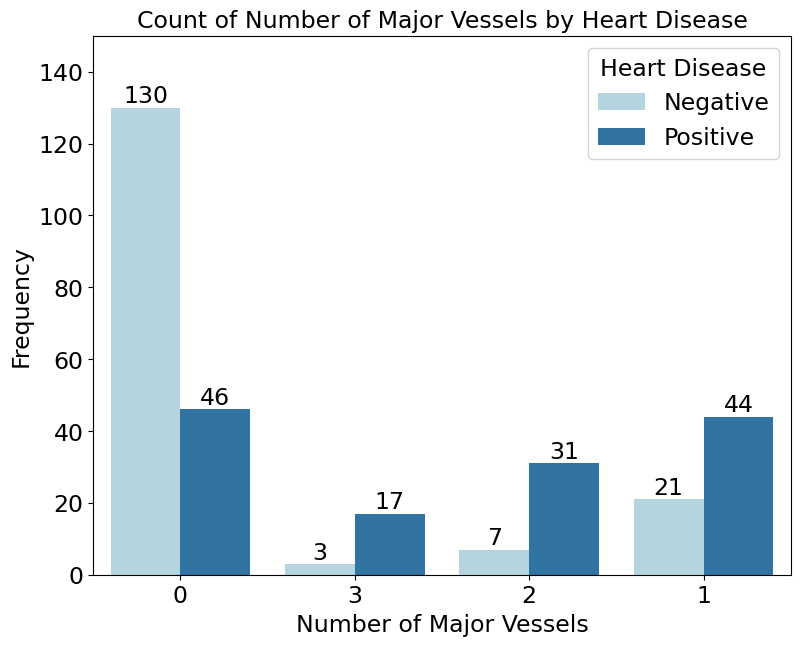

In [33]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='ca', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Number of Major Vessels by Heart Disease', fontsize=17)
plt.xlabel('Number of Major Vessels', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 150)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.show()


#### **8) Distribution of the `thal` Feature by `num`**

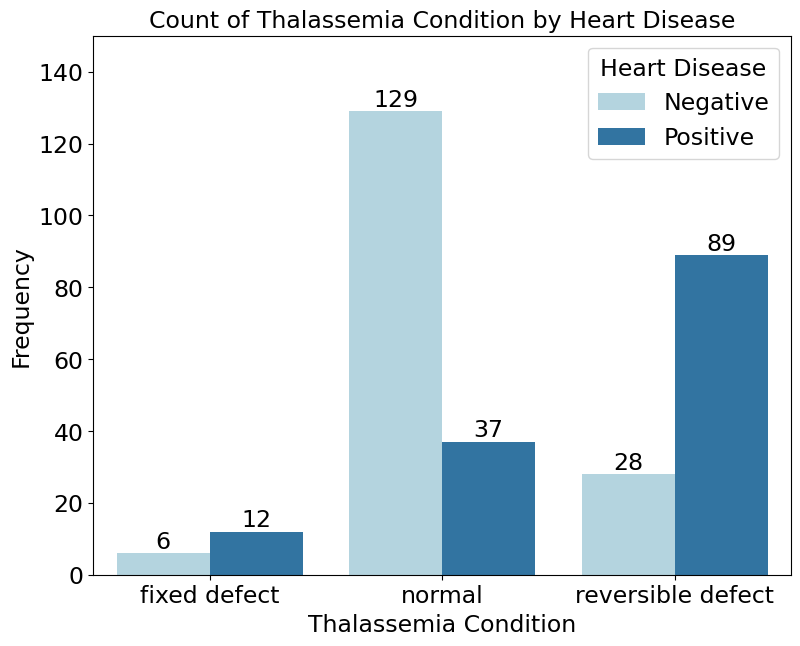

In [34]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df_eda, x='thal', hue='num', palette={'Negative': 'lightblue', 'Positive': 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Thalassemia Condition by Heart Disease', fontsize=17)
plt.xlabel('Thalassemia Condition', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 150)
plt.legend(title='Heart Disease', loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)
plt.show()


#### **B. Numerical Features**

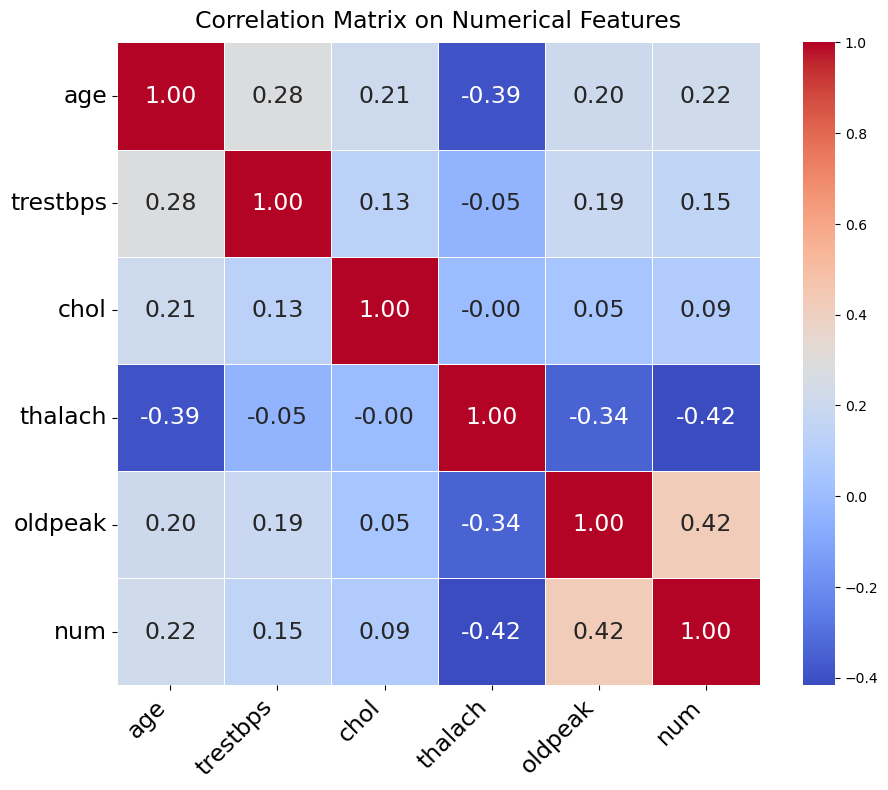

In [35]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix on Numerical Features', fontsize=17, y=1.01)
numeric_df = df[numerical_features + ['num']]
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 17})
plt.xticks(rotation=45, ha='right', fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.tight_layout()
plt.show()

## **4. Data Cleaning**

### **4.1 Delete Missing Values**

In [36]:
df = df.dropna()

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### **4.2 Change Features Data Type**

In [37]:
# Change features "sex", "fbs", "exang", "num" to boolean data type
df = df.astype({
    "sex": "bool",
    "fbs": "bool",
    "exang": "bool",
    "num": "bool"
})

df[['sex', 'fbs', 'exang', 'num']]

,sex,fbs,exang,num
0,True,True,False,False
1,True,False,True,True
2,True,False,True,True
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
297,False,False,True,True
298,True,False,False,True
299,True,True,False,True
300,True,False,True,True


## **5. Feature Engineering**

### **5.1 One-Hot Encoding**

In [38]:
# dummy encode categorical features that has more that 2 categories: "cp", "restecg", "slope", "ca", "thal"
df = pd.get_dummies(df, columns=["cp", "restecg", "slope", "ca", "thal"], drop_first=False)
df[['cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'slope_3', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']]

,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False
2,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True
3,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False
4,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,True
298,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True
299,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True
300,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True


#### **5.2 Check Correlation on All Features**

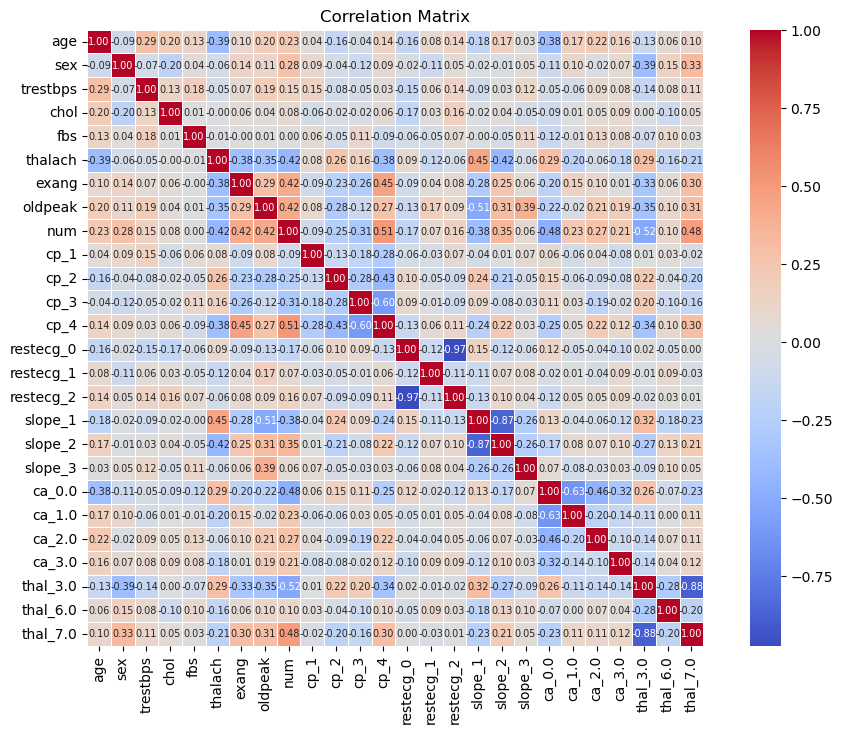

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()

#### **5.3 Check Final Label Distribution**

     num  Sample  Percentage(%)
0  False     160          53.87
1   True     137          46.13


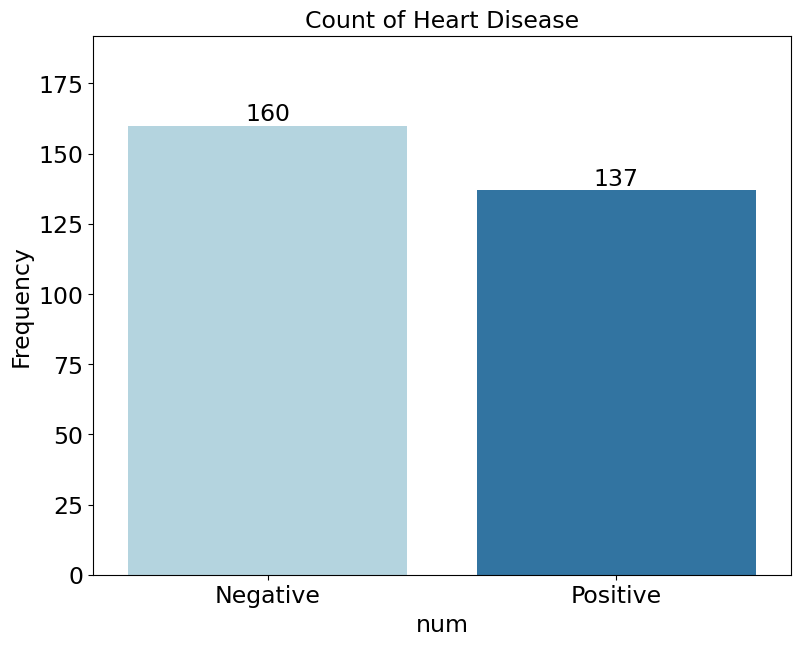

In [40]:
summary_df = df[categorical_features[8]].value_counts().rename_axis(categorical_features[8]).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(2)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=categorical_features[8], hue=categorical_features[8], order=summary_df[categorical_features[8]], palette={True: 'tab:blue', False: 'lightblue'}, dodge=False, legend=False)
ax.set_xticks([False, True])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel(categorical_features[8], fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[categorical_features[8]].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

## **6. Export Cleaned Dataset**

In [41]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    bool   
 2   trestbps   297 non-null    int64  
 3   chol       297 non-null    int64  
 4   fbs        297 non-null    bool   
 5   thalach    297 non-null    int64  
 6   exang      297 non-null    bool   
 7   oldpeak    297 non-null    float64
 8   num        297 non-null    bool   
 9   cp_1       297 non-null    bool   
 10  cp_2       297 non-null    bool   
 11  cp_3       297 non-null    bool   
 12  cp_4       297 non-null    bool   
 13  restecg_0  297 non-null    bool   
 14  restecg_1  297 non-null    bool   
 15  restecg_2  297 non-null    bool   
 16  slope_1    297 non-null    bool   
 17  slope_2    297 non-null    bool   
 18  slope_3    297 non-null    bool   
 19  ca_0.0     297 non-null    bool   
 20  ca_1.0     297 

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,True,145,233,True,150,False,2.3,False,True,...,False,False,True,True,False,False,False,False,True,False
1,67,True,160,286,False,108,True,1.5,True,False,...,False,True,False,False,False,False,True,True,False,False
2,67,True,120,229,False,129,True,2.6,True,False,...,False,True,False,False,False,True,False,False,False,True
3,37,True,130,250,False,187,False,3.5,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,False,130,204,False,172,False,1.4,False,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,False,140,241,False,123,True,0.2,True,False,...,False,True,False,True,False,False,False,False,False,True
298,45,True,110,264,False,132,False,1.2,True,True,...,False,True,False,True,False,False,False,False,False,True
299,68,True,144,193,True,141,False,3.4,True,False,...,False,True,False,False,False,True,False,False,False,True
300,57,True,130,131,False,115,True,1.2,True,False,...,False,True,False,False,True,False,False,False,False,True


In [42]:
df.to_csv('../datasets/processed/ds2_uci_heart_clean.csv', index=False)